# Bài thực hành 3
### Môn: Linear Algebra

In [1]:
import numpy as np

In [2]:
'''
Các phương pháp giải hệ phương trình:
5x1 + x2 - 3x3 = -37
x1 + 4x2 + 2x3 = 6
-3x1 + 2x2 = 7x3 = 4
'''

# Khởi tạo các ma trận

A = np.array([5,1,-3,1,4,2,-3,2,7]).reshape(3,3)
b = np.array([-37,6,4])
A_aug = np.hstack([A, b.reshape(-1,1)])

# kiểm tra điều kiện có nghiệm
r = np.linalg.matrix_rank(A)
r1 = np.linalg.matrix_rank(A_aug)

if r==r1: print("Hệ phương trình có nghiệm.")

#Giải hệ bằng ma trận nghịch đảo
A_inv = np.linalg.inv(A)
print("Nghiệm của hệ phương trình là:", A_inv@b)

Hệ phương trình có nghiệm.
Nghiệm của hệ phương trình là: [-14.   9.  -8.]


In [3]:
# Giải hệ bằng phân tích LU
from scipy import linalg

linalg.lu(A)
lu, piv = linalg.lu_factor(A)
print("Nghiệm của hệ phương trình là:", linalg.lu_solve((lu,piv), b))


Nghiệm của hệ phương trình là: [-14.   9.  -8.]


In [4]:
L = np.tril(A,-1)
U = np.tril(A,1)
D = np.diag(np.diag(A))
print(L, U, D, sep='\n')

X = np.array([1,1,1]) # giá trị xuất phát
for i in range (1,100):
    print(f"Nghiệm xấp xỉ tại bước {i}", X)
    X = np.linalg.inv(D)@(-(L+U)@X+b)
    

[[ 0  0  0]
 [ 1  0  0]
 [-3  2  0]]
[[ 5  1  0]
 [ 1  4  2]
 [-3  2  7]]
[[5 0 0]
 [0 4 0]
 [0 0 7]]
Nghiệm xấp xỉ tại bước 1 [1 1 1]
Nghiệm xấp xỉ tại bước 2 [-8.6        -0.5        -0.14285714]
Nghiệm xấp xỉ tại bước 3 [ 1.3         6.37142857 -6.37142857]
Nghiệm xấp xỉ tại bước 4 [-9.97428571 -2.33571429  4.41632653]
Nghiệm xấp xỉ tại bước 5 [  3.04142857   6.61469388 -11.05959184]
Nghiệm xấp xỉ tại bước 6 [-11.76436735  -1.10561224  10.45813411]
Nghiệm xấp xỉ tại bước 7 [  4.5854898    3.25872886 -19.33867055]
Nghiệm xấp xỉ tại bước 8 [-12.63723557   5.61786152  21.97838817]
Nghiệm xấp xỉ tại bước 9 [  4.11366327  -8.78843782 -35.44908238]
Nghiệm xấp xỉ tại bước 10 [-9.7559757  25.95614738 44.56847251]
Nghiệm xấp xỉ tại bước 11 [ -2.83525377 -41.86239578 -67.19139304]
Nghiệm xấp xỉ tại bước 12 [ 3.80773293 78.37571918 89.2539731 ]
Nghiệm xấp xỉ tại bước 13 [ -26.88287677 -123.4065722  -130.2048987 ]
Nghiệm xấp xỉ tại bước 14 [ 44.16419121 203.45045993 178.25190273]
Nghiệm xấp xỉ 

In [5]:
'''Bài toán hồi quy tuyến tính
   Số năm KN (X) 1.1 1.3 1.5 2.0 2.2
   Thu nhập (y) 39343 46205 37731 43525 39891
   Tìm hàm hồi quy tuyến tính y = b0 + b1x
'''

x = np.array([1.1, 1.3, 1.5, 2.0, 2.2 ])
y = np.array([39343, 46205, 37731, 43525, 39891])

X = np.vstack([np.ones(len(x)), x]).T
print(X)

# Giải hệ phương trình chính tắc
B = np.linalg.solve(X.T@X, X.T@y)
print("các tham số của mô hình:", B)

[[1.  1.1]
 [1.  1.3]
 [1.  1.5]
 [1.  2. ]
 [1.  2.2]]
các tham số của mô hình: [41517.05069124  -109.9078341 ]


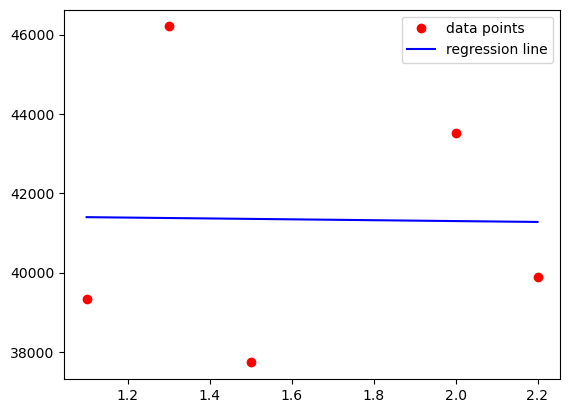

In [6]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'or', label='data points')
plt.plot(x,B[0]+B[1]*x,'-b',label='regression line')
plt.legend()

In [7]:
np.linalg.lstsq(X,y, rcond=None)[0]

array([41517.05069124,  -109.9078341 ])

### Bài tập 1
Giải hệ phương trình tuyến tính ${\bf A}{\bf x}={\bf b}$ với

$${\bf A}=\left[\begin{matrix}
2 & 1 & -1 & -1 \\
2 & 5 & -7 & -5 \\
2 & -1 & 1 & 3 \\
5 & 2 & -4 & 2
\end{matrix}\right],\ 
{\bf b}=\left[\begin{matrix}
1 \\
-2 \\
4 \\
6
\end{matrix}\right]
$$

bằng phương pháp
* Ma trận nghịch đảo
* Phép khử Gauss
* Phân tích LU 

In [8]:
A = np.array

### Bài tập 2
Tìm đa thức nội suy 

$$y(x)=c_0\,f_0(x)+c_1\,f_1(x)+c_2\,f_2(x)+c_3\,f_3(x)$$

đi qua các điểm dữ liệu:

$$(1,1),\,(2,3),\,(3,5),\,(4,4)$$

với hệ hàm cơ sở $\{f_0,f_1,f_2,f_3\}$ được cho sau đây:
* $f_0=1,\,f_1=x,\,f_2=x^2,\,f_3=x^3$
* $f_0=1,\,f_1=x-1,\,f_2=(x-1)(x-2),\,f_3=(x-1)(x-2)(x-3)$

### Bài 3
Nghiệm của một bài toán truyền nhiệt dừng được xấp xỉ bởi nghiệm của hệ phương trình $Ax=b$, với $b=(5,15,0,10,0,10,20,30)$ và 

$$
A = \begin{pmatrix}
4 & -1 & -1 & 0 & 0 & 0 & 0 & 0 \\
-1 & 4 & 0 & -1 & 0 & 0 & 0 & 0 \\
-1 & 0 & 4 & -1 & -1 & 0 & 0 & 0 \\
0 & -1 & -1 & 4 & 0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 & 4 & -1 & -1 & 0 \\
0 & 0 & 0 & -1 & -1 & 4 & 0 & -1 \\
0 & 0 & 0 & 0 & -1 & 0 & 4 & -1 \\
0 & 0 & 0 & 0 & 0 & -1 & -1 & 4 \\
\end{pmatrix}
$$

* Tìm phân tích LU của $A$.
* Sử dụng phân tích LU để giải phương trình $Ax=b$.